## 1. 背景及所要研究的问题 ：
   数据来源于Kaggle网站，泰坦尼克号沉没事件造成了2224名乘客和船员当中的1502人丧生，这份数据中包括了当时泰坦尼克号上部分人的年龄、性别、是否生存、船舱等级等详细的信息。这篇文章将会根据这些数据试图分析：在泰坦尼克事件中具有哪些特征的人群具有高的生存率？

## 2. 加载模块及数据

加载分析所用模块及函数，加载绘图模块

In [1]:
import matplotlib.pyplot as plti
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame, Series


读取数据

In [2]:
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

## 3. 初步浏览数据及数据整理

In [3]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


将性别数据由string: Female & Male转化为integer 0和1,便于后面分析男女比例 




In [5]:
sex_map = {'female': 0, 'male': 1}
titanic_df['Sex'] = titanic_df['Sex'].map(sex_map)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Emarked值缺失两个，先根据Embarked值进行分类并查数量

In [6]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
titanic_df.groupby(['Embarked'],as_index = False).count()

,Embarked,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,C,168,168,168,168,168,130,168,168,168,168,69
1,Q,77,77,77,77,77,28,77,77,77,77,4
2,S,644,644,644,644,644,554,644,644,644,644,129


上面结果显示644人的Embarked值为'S',占绝大多数，所以用S来补充缺失的Embarked值

In [8]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

Age和Cabin缺失较多，在后面专门对这两个变量分析的时候进行去NaN处理。再次总览一下数据情况如下：

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


## 4. 数据分析:

**4.1 先不考虑各变量之间的相互关系，各变量分别进行分析**

各非连续变量总体统计数据如下：

In [10]:
titanic_df[['Survived','Pclass','Sex','SibSp','Parch']].describe()

,Survived,Pclass,Sex,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.523008,0.381594
std,0.486592,0.836071,0.477990,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000


以上表可以看出：
1. 平均生存率为38.3%， 与Kaggle网站显示的全体2224人的生存率40%相当。
2. 船舱等级中位数为3，均值为2.3， 说明大多数为低等舱位。
3. 性别均值为0.647，说明男性较多

下面将对两个连续变量Age和Fare进行图形分析，首先去除Age中的NaN数据

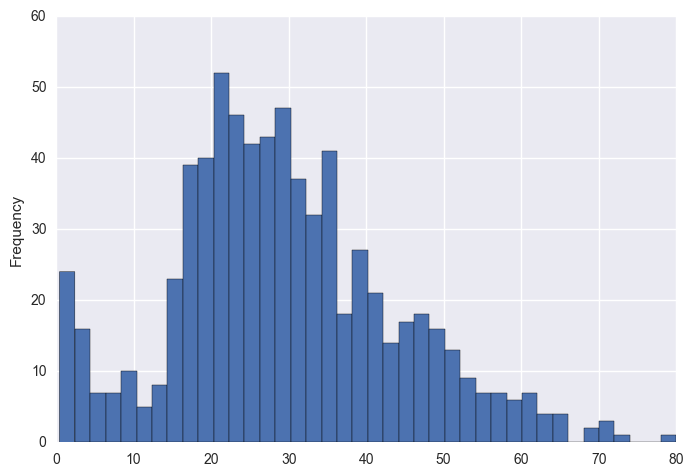

In [11]:
titanic_df['Age'].dropna().plot.hist(bins = 40)

上面图可以看出年龄总体呈正态分布，但是0至10岁有一个明显的outlier

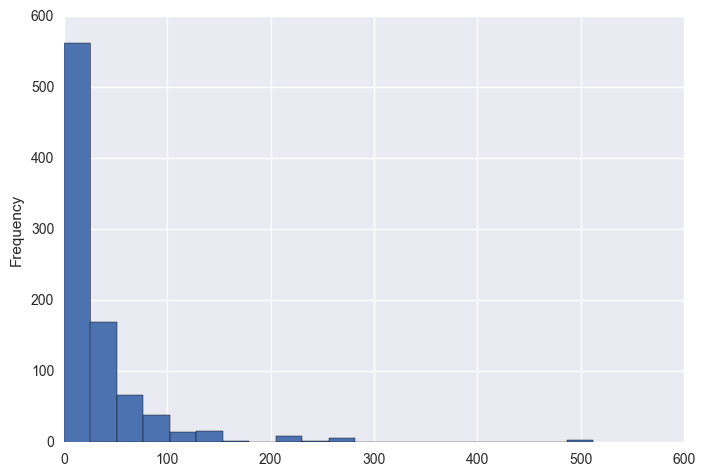

In [12]:
titanic_df['Fare'].plot.hist(bins = 20)

上面图片说明绝大部分人付费较低，这和大部分人船舱等级较低是相合的

**4.2 以下通过图表方式研究各变量和生存情况(Survived)的关系**

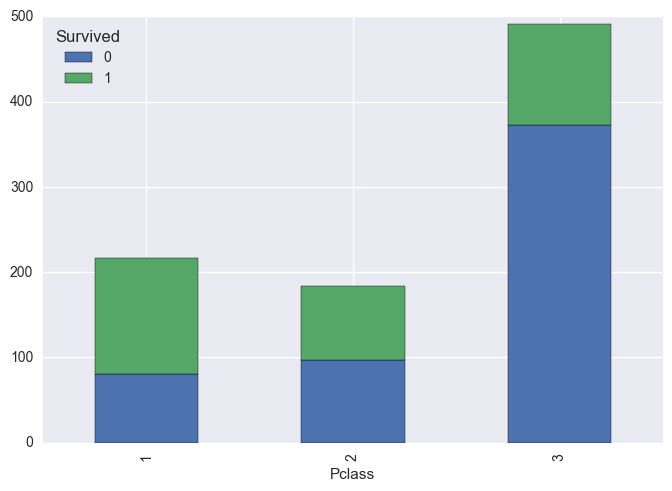

In [13]:
titanic_df.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)

船舱等级和生存率有一定的相关性，高等级舱位的生存数量明显相对较高。

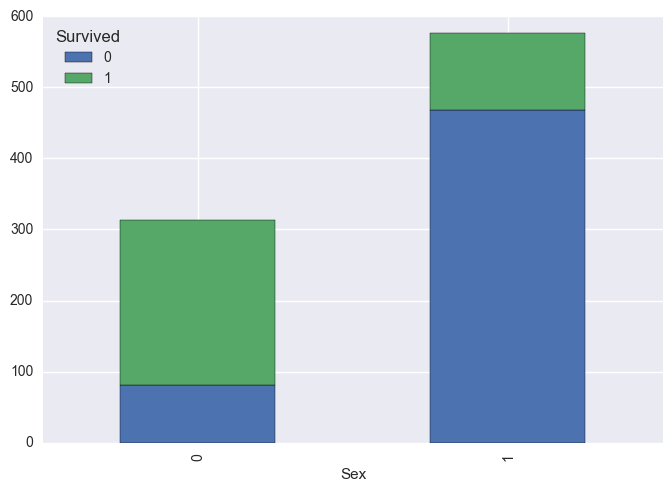

In [14]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)

性别和生存率有较大的相关性，女性生存数量明显相对较高

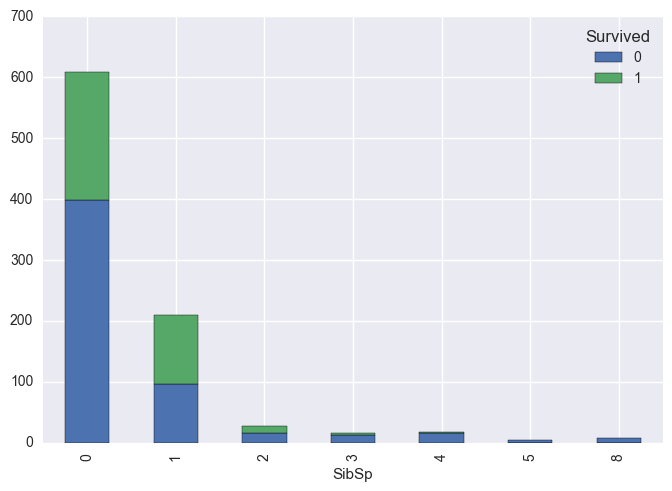

In [15]:
titanic_df.groupby(['SibSp','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)

Sibsp指登船的兄弟姐妹或者配偶，Sibsp值为1的样本明显比Sibsp值为0的样本生存率高。Sibsp值更高的样本数量较少，它们的生存率不能说明太多问题。总体来说Sibsp的值和生存情况看不出明显的相关性。

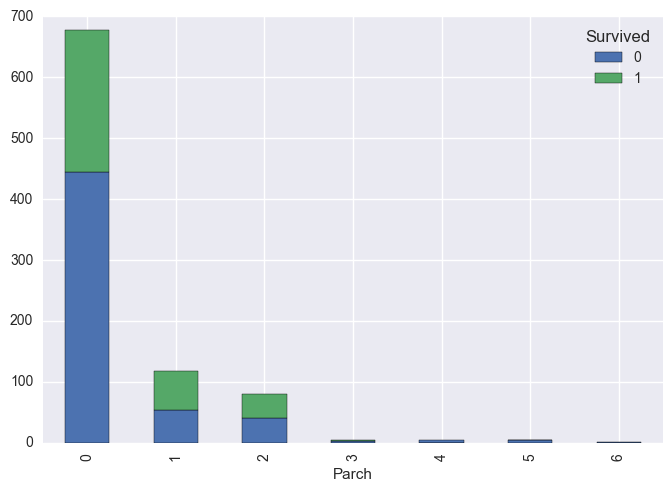

In [16]:
titanic_df.groupby(['Parch','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)

Parch指同行的父母或者子女个数，上图不能看出明显的Parch和生存率的相关性。

对于两个连续变量Fare以及Age分别与Survived的关系，采用列表方式进行分析

In [17]:
titanic_df[["Fare", "Survived"]].groupby(['Survived']).describe()

Fare
Survived                  
0        count  549.000000
         mean    22.117887
         std     31.388207
         min      0.000000
         25%      7.854200
         50%     10.500000
         75%     26.000000
         max    263.000000
1        count  342.000000
         mean    48.395408
         std     66.596998
         min      0.000000
         25%     12.475000
         50%     26.000000
         75%     57.000000
         max    512.329200

由两个分组的平均Fare值差别可以看出Fare值还是和生存率有一定的相关性，这和头等舱生存率较高相合。

将Age数据去除NaN，然后按照Survived值进行分组分析

In [18]:
titanic_df[["Age", "Survived"]].dropna().groupby(['Survived']).describe()

Age
Survived                  
0        count  424.000000
         mean    30.626179
         std     14.172110
         min      1.000000
         25%     21.000000
         50%     28.000000
         75%     39.000000
         max     74.000000
1        count  290.000000
         mean    28.343690
         std     14.950952
         min      0.420000
         25%     19.000000
         50%     28.000000
         75%     36.000000
         max     80.000000

两组的平均年龄及中值年龄都看不出明显的和生存情况的相关性。我们可以再看一下不同年龄段生存和非生存数量的比较。

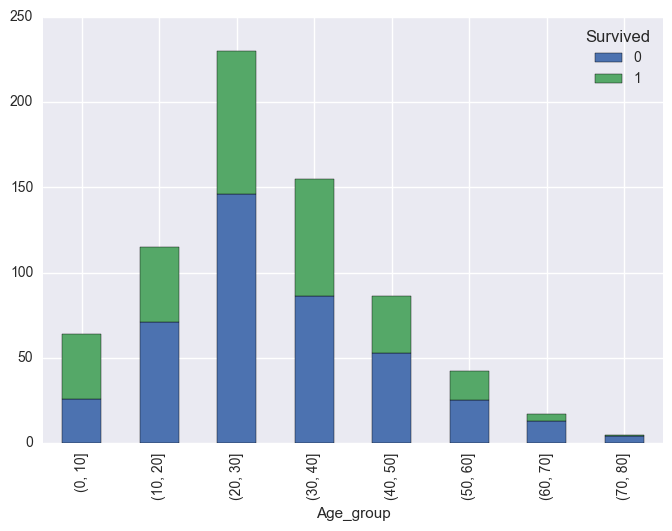

In [19]:
bins = np.arange(0,90,10)
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], bins)
titanic_df[["Age", "Survived","Age_group"]].dropna().groupby(['Age_group', 'Survived'])['Survived']\
                                            .count().unstack().plot(kind='bar',stacked=True)

再看一下不同年龄组孩子的生存率比较

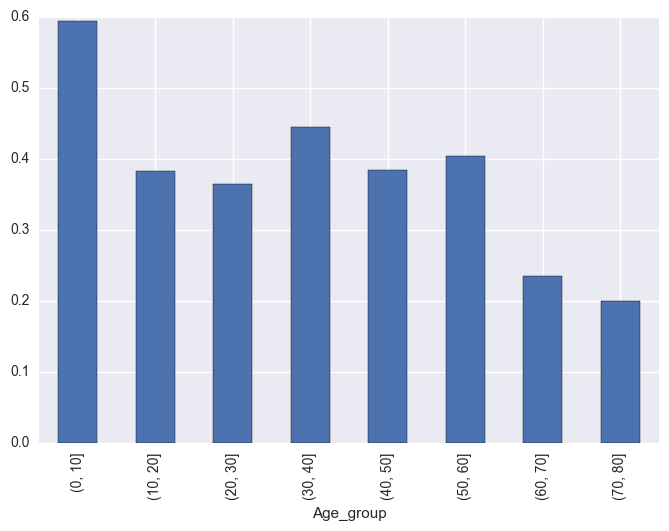

In [20]:
titanic_df[["Age", "Survived","Age_group"]].dropna().groupby('Age_group')['Survived'].mean().plot(kind='bar')

通过以上分析可以看出，小于十岁的孩子生存率高于其他年龄组。

## 5. 总结

**以上分析可以总结如下：**
1. 船舱等级可能和生存率具有相关性，说明富人还是可能有更多的求生机会。
2. 从性别上看女性看来有更高的生存率。
3. 从总体上来看，年龄和生存率没有明显关系，但是也可以看出低龄儿童得到了较好的保护。

**同时应该注意的是，本文的分析还有一些局限性：**
1. 对Embarked数据的缺失值采用了按照最常出现的值来补缺的方法，可能会存在一定偏差。
2. 本文并未采用更详细的统计分析及机器学习手段。只能发现相关性，不能说明因果性。
2. 相对于总人数2224来说，本数据集的样本较小，Age和Cabin也有较多缺失，对分析的准确性有一定影响。
3. 数据集未提供更多的身份信息，不能将乘客和船员对照进行生存率分析。


## 6. 参考资料

1. http://www.webpages.uidaho.edu/~stevel/504/Pandas%20DataFrame%20Notes.pdf
2. https://pandas.pydata.org/pandas-docs/stable/missing_data.html